# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

#### Import Libaries
First, I'll load the libaries that I'll be using.

In [37]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

#### Loading the data
Next, we load the data and view the first few rows.

In [38]:
# Load the raw data
raw_data = pd.read_csv("data/toyota.csv")
print(raw_data.head())

   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0


#### Exploratory Data Analysis
We'll now need to complete some initial EDA to understand the state of the data to evaluate how much tidy wrangling and cleansing we'll need to complete.

1. First, we'll review the dataframe information

In [39]:
# Initial EDA to see if we need to clean the data
## Any missing values?
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None


It looks like there is no null or NA data. That's a good start.

2. Now, we'll review the numerical details

In [40]:
## What are the ranges of the numeric values?
print(raw_data.describe())

              year         price        mileage          tax          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.000000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31063.750000   145.000000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

        engineSize  
count  6738.000000  
mean      1.471297  
std       0.436159  
min       0.000000  
25%       1.000000  
50%       1.500000  
75%       1.800000  
max       4.500000  


Everything appears to be reasonable.

**Note:** 
We'll have to see why there's a lot of £0 tax, if this remains important later though.

3. Now we'll look at value counts for the different categorical data features.

In [41]:
## Lets look at the unique values of strings too
print(raw_data.model.value_counts())

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64


In [42]:
print(raw_data.transmission.value_counts())

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


In [43]:
print(raw_data.fuelType.value_counts())

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64


There doesn't appear to be any missing values, or misspelt words other than extra spaces in the models
(e.g. no instance where a model, transmission or fuel type appears in multiple different ways)

There could still be outliers that skew the data.
 - There are still 105 other fuel types, 1 other transmission and some car models have only a few data points.
 
 #### EDA - part 2
Whilst there doesn't appear to be any initial findings that require an immediate tidy of the data, we should continue to review what the data tells us.

 4. We should now review the correleation between the numerical values

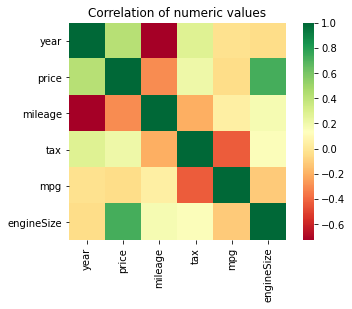

<Figure size 432x288 with 0 Axes>

In [44]:
# Lets have a look at a basic correlations of the numerical values in the dataframe

sns.heatmap(raw_data.corr(), square=True, cmap='RdYlGn').set(title='Correlation of numeric values')
plt.show()
plt.clf()

This makes sense.  
 - There is a correlation between the price and the age of the car and the price and engine size.
 - There is a small negative correleations with the price and mileage.
 - There is a strong negative correlation between the mileage and year, which also makse sense, as the older a car is, the more miles it's likely done.
 
##### Lets visualise the data

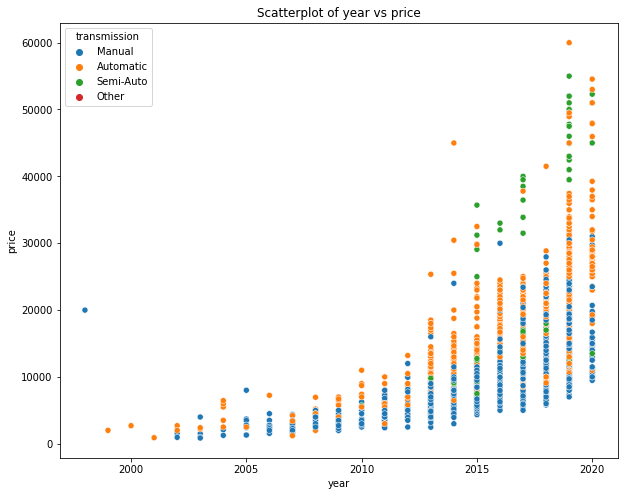

<Figure size 432x288 with 0 Axes>

In [45]:
# Let's look at the price and year, with the transmission as the color
plt.figure(figsize = (10, 8))
sns.scatterplot("year", "price", data = raw_data, hue = "transmission").set(title='Scatterplot of year vs price')
plt.show()
plt.clf()

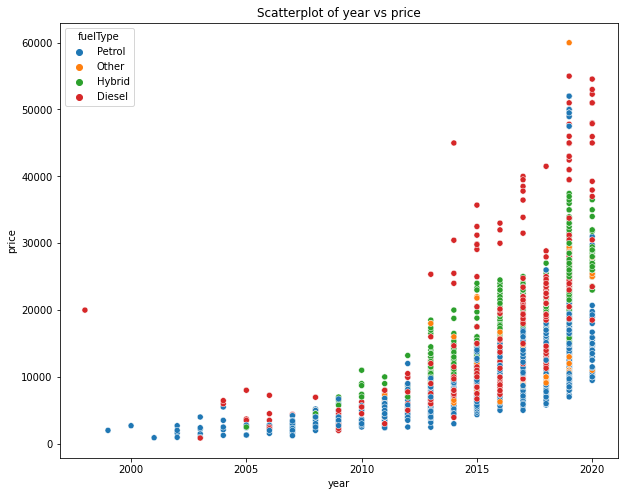

<Figure size 432x288 with 0 Axes>

In [46]:
# Let's look at the price and year, with the fuel type as the color
plt.figure(figsize = (10, 8))
sns.scatterplot("year", "price", data = raw_data, hue = "fuelType").set(title='Scatterplot of year vs price')
plt.show()
plt.clf()

 - As expected, there is an increase in price if the car is newer, however it's more of a curve than a straight line, 
 - Automatic cars are much more expensive than manuals when they're new, but of a similar price when they're older.
 - The same is true for fuel type, where Diesel is more expensive when the car is new, but less important as they age.
 - There might be the odd outlier though, such as the expensive old manual, or the aging automatic.  **Note:** However there could be good reason for this, such as vintage models?
 
As we know there is a difference between transmissions, lets review what this looks like in a boxplot.

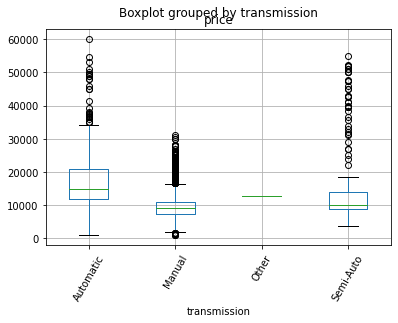

<Figure size 432x288 with 0 Axes>

In [47]:
# Lets look at a boxplot of the transmission
raw_data.boxplot("price", "transmission", rot=60)
plt.show()
plt.clf()

Whilst useful, this doesn't provide us with much more information, likely because other attributes contriubte to the price.  

I wonder if a violinplot is clearer?

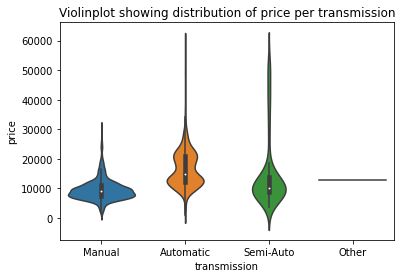

<Figure size 432x288 with 0 Axes>

In [48]:
sns.violinplot("transmission", "price", data = raw_data).set(title="Violinplot showing distribution of price per transmission")
plt.show()
plt.clf()

The violin plot shows a clear difference in the distribution of price across transmission types.
 - Whilst the bulk of cars are of similar value, automatics and semi-autos can be much more expensive than manuals.
 - We don't hold enough information on the Other transmission type. This might be an error, or a feature with too little data points.

However, as we've seen, the age of the car will make a difference too.  The following subplots show this.

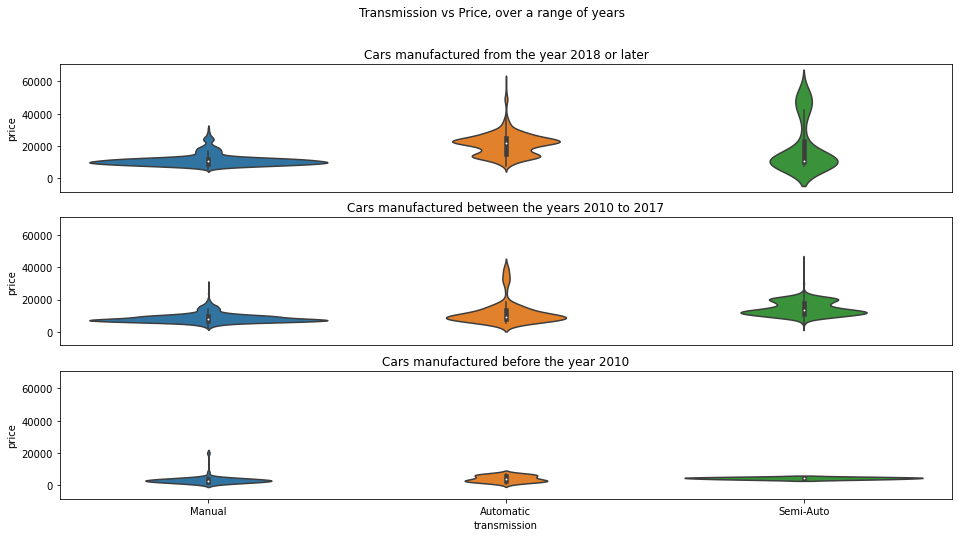

<Figure size 432x288 with 0 Axes>

In [49]:
# It is.  However as we've seen, the age of the car will make a difference too.
fig, axs = plt.subplots(3, sharex = True, sharey=True, figsize = (16, 8))
fig.suptitle('Transmission vs Price, over a range of years')
sns.violinplot("transmission", "price", 
               data = raw_data[raw_data.year >= 2018], 
               ax = axs[0])
axs[0].xaxis.set_visible(False)
axs[0].set_title('Cars manufactured from the year 2018 or later')

sns.violinplot("transmission", "price", 
               data = raw_data[(raw_data.year >= 2010) & (raw_data.year < 2018)], 
               ax = axs[1])
axs[1].xaxis.set_visible(False)
axs[1].set_title('Cars manufactured between the years 2010 to 2017')

sns.violinplot("transmission", "price", 
               data = raw_data[raw_data.year < 2010], 
               ax = axs[2])
axs[2].set_title('Cars manufactured before the year 2010')

plt.show()
plt.clf()

##### Summary
We can establish that both the age of the car and the transmission will make a difference to the price.
However, how much of a difference does the car model make?

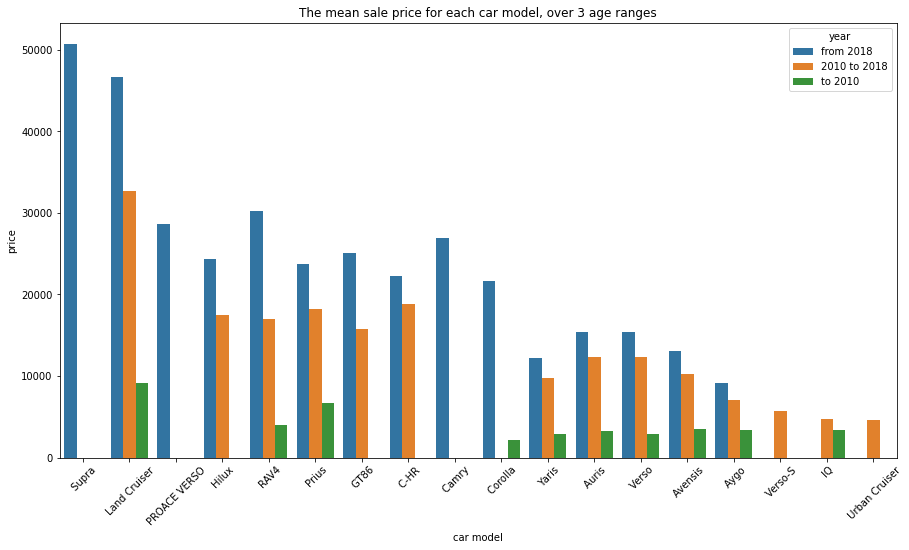

<Figure size 432x288 with 0 Axes>

In [50]:
x_series = raw_data.sort_values(by = "price", ascending = False).model.unique()
model_mean_price = pd.DataFrame(index = x_series)

model_2018 = raw_data[(raw_data.year >= 2018)].groupby(["model"]).price.mean().round(2).rename("from 2018")
model_2010 = raw_data[(raw_data.year > 2010) & (raw_data.year < 2018)].groupby(["model"]).price.mean().round(2).rename("2010 to 2018")
model_2000 = raw_data[(raw_data.year <= 2010)].groupby(["model"]).price.mean().round(2).rename("to 2010")

model_mean_price = model_mean_price.join(other = model_2018, how = "left").join(other = model_2010, how = "left").join(other = model_2000, how = "left")

model_mean_price = model_mean_price.reset_index().melt(id_vars = "index", var_name = "year", value_name = "price").set_index("index")

plt.figure(figsize = (15,8))
sns.barplot(model_mean_price.index, model_mean_price.price, hue = model_mean_price.year).set(title="The mean sale price for each car model, over 3 age ranges")
plt.xticks(rotation=45)
plt.xlabel("car model")

plt.show()
plt.clf()



It's clear that some cars ar emuch more expensive than others

As we saw earlier, we also have a range of data, with many of the sales being a Yaris or Aygo, but very few data points for the Supra (the most expensive car) any many other car models, like the Urbran Cruiser and Verso-S.

Here is a table showing how much of the data represents each car model.

In [51]:
(raw_data.model.value_counts(normalize = True)*100).round(2)

 Yaris            31.49
 Aygo             29.10
 Auris            10.57
 C-HR              7.11
 RAV4              7.02
 Corolla           3.96
 Prius             3.44
 Avensis           1.71
 Verso             1.69
 Hilux             1.28
 GT86              1.08
 Land Cruiser      0.76
 PROACE VERSO      0.22
 Supra             0.18
 Camry             0.16
 IQ                0.12
 Urban Cruiser     0.06
 Verso-S           0.04
Name: model, dtype: float64

 - We should call this out in our presentation, as it'll make our model stronger for Yaris and Augo's, but weaker, less accurate for others.

##### Are there any features we can drop?

The tax and mpg don't appear to be big contributing factors to the price.  Let's check this before we drop them.

In [52]:
print("The top 10 tax values")
print(raw_data.tax.value_counts(normalize=True).head(n=10))

The top 10 tax values
145    0.310181
0      0.265657
135    0.100623
30     0.087118
150    0.078510
20     0.037548
140    0.033096
125    0.029089
260    0.013802
200    0.010982
Name: tax, dtype: float64


Interestingly, almost all tax is £145, or £0.  Why £0? Let's look at those at £0.

In [53]:
print("Fuel type value counts, where tax is £0")
print(raw_data[raw_data.tax == 0].fuelType.value_counts())

Fuel type value counts, where tax is £0
Hybrid    995
Petrol    741
Diesel     27
Other      27
Name: fuelType, dtype: int64


In [54]:
print("Car model value counts, where tax is £0")
print(raw_data[raw_data.tax == 0].model.value_counts())

Car model value counts, where tax is £0
 Aygo     704
 Yaris    452
 Auris    414
 Prius    122
 C-HR      94
 IQ         4
Name: model, dtype: int64


In [55]:
print("Transmission value counts, where tax is £0")
print(raw_data[raw_data.tax == 0].transmission.value_counts())

Transmission value counts, where tax is £0
Automatic    1041
Manual        704
Semi-Auto      44
Other           1
Name: transmission, dtype: int64


In [56]:
print("Engine size value counts where tax is £0")
print(raw_data[raw_data.tax == 0].engineSize.value_counts())

Engine size value counts where tax is £0
1.0    748
1.8    620
1.5    393
1.4     27
0.0      2
Name: engineSize, dtype: int64


And finally, lets visualise the tax vs price, with tranmission as the hue.

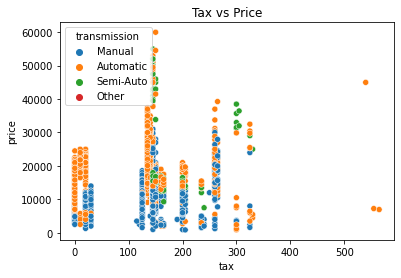

<Figure size 432x288 with 0 Axes>

In [57]:
sns.scatterplot("tax", "price", data = raw_data, hue = "transmission").set(title="Tax vs Price")
plt.show()
plt.clf()

There doesn't appear to be anything special that shows why tax should be £0.  There are exemptions available such as for electric vehicals, but this doesn't appear to be the case.  Is this an error in the data?

There also doesn't appear to be a correleation between the price and the tax.
 - We should drop tax, as it seems to add little value.

Is there any correlation with the price and the MPG?

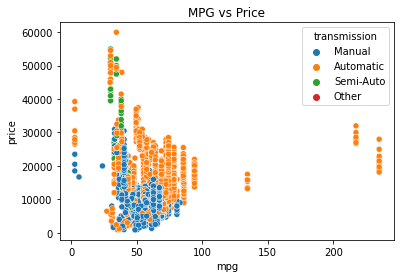

<Figure size 432x288 with 0 Axes>

In [58]:
# How about the MPG? Any correlation here?
sns.scatterplot("mpg", "price", data = raw_data, hue = "transmission").set(title="MPG vs Price")
plt.show()
plt.clf()

Interestingly, you might be able to predict the transmission using mpg and price with maybe knn, however this doesn't add value to our task.  There appears to be no strong correleation between price and mpg but I don't want to drop it just yet.  I'd rather have our potential model confirm it's importance.

#### Machine Learning
##### Part 1 - Getting the data ready

We're looking at predicting a continuous numerical value, based on an existing dataset.  I'd therefore want a supervised learning regression technique used.

These require no categorical data and we should remove any unneeded feature.
 - I start by reording the dataframe, with the target column first and independant volumes after.
 - I then drop the tax feature, as this won't be used.
 - I strip any extra spaces from the car models. I don't believe this will make a difference, however it'll give us a cleaner dataframe.
 - Finally, I'll encode the categorical features (transmission, fuel type, model)

In [59]:
# So we now want to tidy our data and get this ready for machine learning techniques
# Let's reorder the columns, so price is first
model_df = raw_data[['price', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax','mpg', 'engineSize']]

# Then, lets drop the columns we don't want
model_df = model_df.drop(["tax"], axis = "columns")

# The models contain spaces, it's not going to make a difference, but I'd prefer to fix this.
model_df["model"] = model_df["model"].str.strip()

# We'll want to use regression as we're predicting a contunious number,  
# we should therefore transfrom categorical data to numbers.

# Which features are categorical? Lets use LabelEncoder to change these.
cat_features = ["transmission", "fuelType", "model"]

encoder = LabelEncoder()
encoded = model_df[cat_features].apply(encoder.fit_transform)
model_df.drop(cat_features, axis = 1, inplace = True)
model_df = pd.concat([encoded, model_df], axis=1)
print("The head of the new data frame")
print(model_df.head())

The head of the new data frame
   transmission  fuelType  model  price  year  mileage   mpg  engineSize
0             1         3      6  16000  2016    24089  36.2         2.0
1             1         3      6  15995  2017    18615  36.2         2.0
2             1         3      6  13998  2015    27469  36.2         2.0
3             1         3      6  18998  2017    14736  36.2         2.0
4             1         3      6  17498  2017    36284  36.2         2.0


**Note** My approach works for this fixed dataset, however in case the data is updated in the future,
 - I should come back to this and provide the model a list of car models, fuel, transmission, including "other" 
 - I should encode those values, rather than directly from the dataframe
This would help ensure any changes to the data, such as new car models don't impact the encoding or model performance.
 - i.e. if fuel type 1 is _**n**_ then it should always represent _**n**_, even for new data sets.
 
Following this encoding, are there any features that are highly correlated, allowing us to drop them, making our model more efficient?

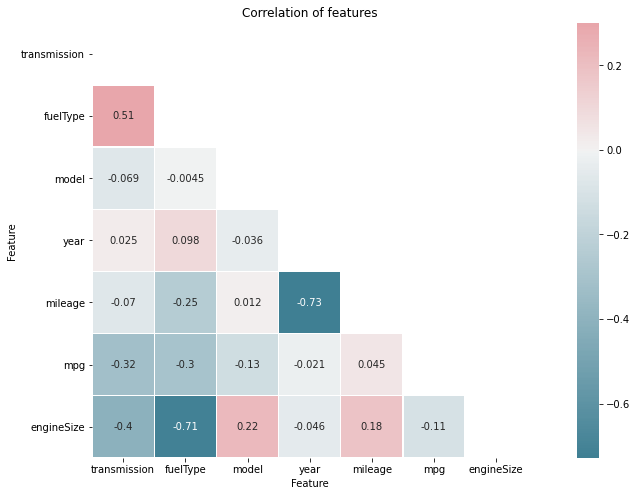

<Figure size 432x288 with 0 Axes>

In [60]:
# Are there any features that are highly correlated to each other now that we've encoded categorical
#    data to numeric? If so, can we drop them?
corr = model_df.drop(columns=["price"]).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, annot = True).set(title="Correlation of features")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.show()
plt.clf()

We can possibly drop milage as it's correlated to year, and fuel type as it's correlated to engine size.
 - I think I'll see how well the model performs first and then remove these if it's too slow.

##### Part 2 - Creating the model

First, I'll set the basic parameters
 - SEED to 42
 - test size to 30%

Then, I'll create a train_test split.

In [61]:
# Parameters
SEED      = 42
test_size = 0.3   #  30% test, 70% train

# Now let's split the data
X = model_df.drop(["price"], axis = "columns")          # Independant columns (all the features used for prediction)
y = model_df["price"]                                   # Target Columns - the Price range

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=SEED)

We now need to scale the data.  
 - I'm doing this after the train, test split to prevent potential leakage into the model.
 - I need to scale this because there can be some big differences in the values present in each feature (year, milage, models etc)

In [62]:


scaler           = StandardScaler()
X_train2         = pd.DataFrame(scaler.fit_transform(X_train))
X_test2          = pd.DataFrame(scaler.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns  = X_test.columns.values

X_train2.index   = X_train.index.values
X_test2.index    = X_test.index.values

X_train          = X_train2
X_test           = X_test2

I'm going to begin using a Random Forest Regressor.  If this performs badly, we can revisit.
 - This is because there appears to be a non-linear correlation in the data and so a linear approach may perform worse.

Due to the size of the data, the variance and for better model performance, I'll also use a cross validation on the training set 

I'll also use a scoring method of R2 for the training set and then R2 and MAE for the test set.
MAE is the ultimate performance indicator, becaue we need to ensure the model can predict values within a tolerance of £1,500.

In [63]:
scores = []
forest = RandomForestRegressor(n_estimators = 20, random_state = SEED)
acc = cross_val_score(forest, X_train, y_train, scoring = "r2", cv = 5)
scores.append(round(acc.mean()*100,2))

In [64]:
results = pd.DataFrame({"Metrics":["R2"], "Accuracy": scores})
print("Initial Cross Validation Results")
print(results)

Initial Cross Validation Results
  Metrics  Accuracy
0      R2     95.12


Not bad - an R2 accuracy of 95.12%.  Can we do better with hyper parameters?
I'll use a GridSearchCV to find out with the following parameters:
 - "bootstrap":[True, False],
 - "max_depth":[80, 100],
 - "max_features":[2, 3],
 - "min_samples_leaf":[4, 5],
 - "min_samples_split":[6, 10],
 - "n_estimators":[50,150]

The score is already fairly good so I don't want to add too much to the cross validation, however some hypertuning will hopefully improve the model.

In [65]:
param_grid = {
    "bootstrap":[True, False],
    "max_depth":[80, 100],
    "max_features":[2, 3],
    "min_samples_leaf":[4, 5],
    "min_samples_split":[6, 10],
    "n_estimators":[50,150]
}

forest = RandomForestRegressor(random_state=SEED)
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [66]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.3s
[C

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [6, 10],
                         'n_estimators': [50, 150]},
             verbose=2)

In [67]:
print("Best parameters are:")
print(grid_search.best_params_)

Best parameters are:
{'bootstrap': False, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


**We have our best parameters. How did it do?**

In [68]:
scores2 = []
best_grid = grid_search.best_estimator_
acc2 = cross_val_score(best_grid, X_train, y_train, scoring = "r2", cv = 5)
scores2.append(round(acc2.mean()*100,2))
results = pd.DataFrame({"Metrics":["R2"], "Accuracy":scores,"Accuracy Tuned Param": scores2})
print("Results of the hyper tuned grid cross validation")
print(results)

Results of the hyper tuned grid cross validation
  Metrics  Accuracy  Accuracy Tuned Param
0      R2     95.12                 95.59


We had an amazing score before the hyper-tuning, however this has improved it, which is good.

##### How well does this perform on the test data - data it's never seen before?

In [69]:
# How well does this perform on data it's never seen before? Let's use the test data
best_grid    = grid_search.best_estimator_
y_pred       = best_grid.predict(X_test)
acc_test_r2  = round(r2_score(y_test, y_pred)*100,2)
acc_test_MAE = round(MAE(y_test, y_pred),2)

In [70]:
results = pd.DataFrame({"R2 Accuracy":scores,
                        "R2 Accuracy Tuned Param": scores2,
                        "R2 Accuracy Test Set":acc_test_r2,
                        "MAE": acc_test_MAE})
print("Results when using the test data:")
print(results)

Results when using the test data:
   R2 Accuracy  R2 Accuracy Tuned Param  R2 Accuracy Test Set     MAE
0        95.12                    95.59                 96.46  787.24


This shows a good R2 on the test set and an MAE of £787.24, which is within our tolerance of £1,500!
There's no need to review other regression models just yet.

However, it'll be good to explain the importance of each feature to the Head of Sales.
##### Which features are the most important when predicting pridce

In [71]:
# However, it'll be good to explain the importance of each feature to the head of sales.
# Which features were the most important?
name = []
importance = []
for n, i in zip(X, best_grid.feature_importances_):
    name.append(n)
    importance.append(round(i*100,2))

features = pd.DataFrame({"Features": name, "Importance (%)":importance})
features = features.sort_values(by = "Importance (%)", ascending = False)
print("Importance of features")
print(features)

Importance of features
       Features  Importance (%)
6    engineSize           38.76
3          year           17.00
2         model           11.53
5           mpg           10.07
4       mileage            8.75
0  transmission            7.67
1      fuelType            6.21


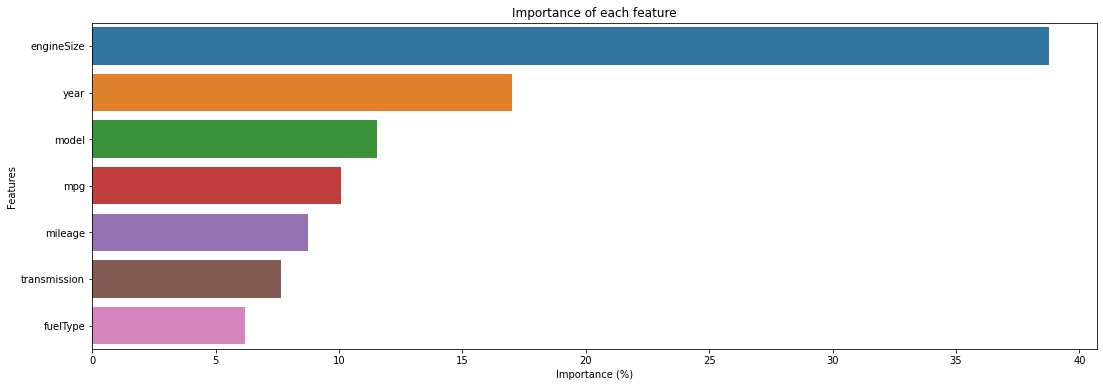

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize = (18, 6))
sns.barplot("Importance (%)", "Features", data = features, orient = "h").set(title="Importance of each feature")
plt.show()
plt.clf()

### Summary

There we have it, using a random forrest regressor, with a cross validation grid search with hyper parameter tuning, we've been able to predict an R2 of 96% and a mean absoulte error of 787.24.

However, there is much more we could do.
The model will be really good at predicting the common car types, but less useful at predicting the more rare or high end car models, where we had much less data.

I'd like to improve the model to understanding the model score based on different car models and explore what more could be done to improve the score for those without many data points.  We may even want to consider multiple approaches, based on the car model / data initially available to us.

It'll also be good for sales to provide us with more data to feed into the model.